# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
#had to see what I was looking at
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
#using idxmax() to find the indicies of the rows with the max values for each column
data.idxmax()

Fresh               181
Milk                 86
Grocery              85
Frozen              325
Detergents_Paper     85
Delicatessen        183
dtype: int64

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85,181,86]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,22925,73498,32114,987,20070,903


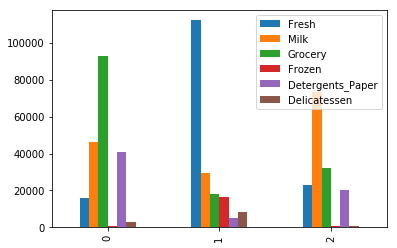

In [6]:
samples.plot.bar()

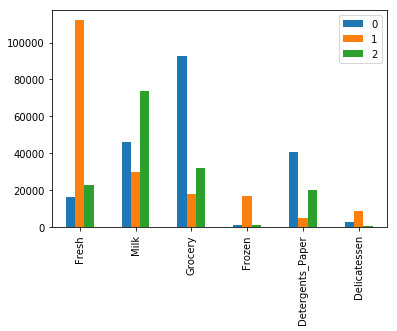

In [7]:
samples_T = samples.transpose()
samples_T.plot.bar()

In [8]:
#normalizing all values based on the population means for each feature

samples_adj = samples.copy()
samples_adj['Fresh'] = samples_adj['Fresh'] / data['Fresh'].mean()
samples_adj['Milk'] = samples_adj['Milk'] / data['Milk'].mean()
samples_adj['Grocery'] = samples_adj['Grocery'] / data['Grocery'].mean()
samples_adj['Frozen'] = samples_adj['Frozen'] / data['Frozen'].mean()
samples_adj['Detergents_Paper'] = samples_adj['Detergents_Paper'] / data['Detergents_Paper'].mean()
samples_adj['Delicatessen'] = samples_adj['Delicatessen'] / data['Delicatessen'].mean()
samples_adj

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.343050,7.970131,11.668566,0.333992,14.168696,1.930656
1,9.345685,5.111394,2.282401,5.450967,1.717165,5.607034
2,1.910369,12.680233,4.038848,0.321296,6.965139,0.592181


In [9]:
#adding in total annual spend for each customer

samples['Total'] = samples.sum(axis=1)
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,16117,46197,92780,1026,40827,2944,199891
1,112151,29627,18148,16745,4948,8550,190169
2,22925,73498,32114,987,20070,903,150497


In [10]:
#total annual spend for each future for all customers
data.sum(axis=0)

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

* Customer 0 (Index 85): They are the largest single purchaser of *Grocery* and *Detergents_paper* products at 11X and 14X the annual average for all customers respectively. They also purchase a higher than average amount of *Milk* but an average amount of *Fresh* products. From this profile I'm going to say they're a wholesale retailer that either purchases their *Fresh* products from another supplier or doesnt'carry these lines of products. 
* Customer 1 (Index 181): They are the largest single purchaser of *Fresh* products at 9X the annual average of all customers. They also purchase 5X the average of *Milk*, *Frozen* and *Delicatessen* products. From this profile I'm going to say that they are a large restaurant chain that purchases their *Fresh* produce primarily from this wholesaler. They also purchase some of their *Milk*, *Frozen* and *Delicatessen* needs from our supplier. 
* Customer 2 (Index 86): They are the largest single purchaser of *Milk* at 12X the annual average for all customers. They also purchase alot of *Detergents_paper* products. I'm going to go out on a limb and say this is a Cheese manufacturer that buys their milk and santization needs from our supplier.

To be honest, I don't believe having these simple statistics describe the data is a particularly insightful way for trying to segment these customers. I think an important variable which could complicate this analysis is Procurement Strategy. Ie. some businesses may prefer buying from the fewest amount of suppliers possible where others will happily purchase their needs primarily on price from many suppliers and switch them frequently. This could easily mask either their *normal* annual spend in each category because they buy from many suppliers so the data from our supplier may not be sufficient to determine what kind of business they truly are. BUT hey, we're here to segment them so I assume this is going to work :-)

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [11]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy().drop(columns='Delicatessen')

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

X = new_data
y = data['Delicatessen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score

#score = r2_score(y_test, y_pred)
score = regressor.score(X_test, y_test)

print ('R_2 Score: '+str(score))

R_2 Score: -2.2547115372


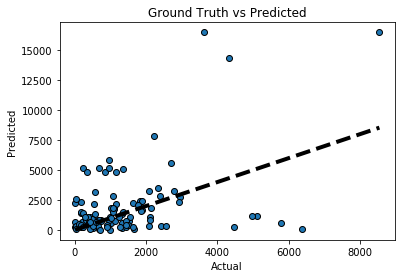

In [12]:
#I was curious to visualize the poor R2_score, so I googled it and found the code block below on this website:
#[https://acadgild.com/blog/using-decision-trees-for-regression-problems]

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* I had attempted to predict *Delicatessen*. I had not selected this datapoint for any specific reason.
* The R^2 was -2.25 which suggests that the model has failed to fit the data. This doesn't however suggest that this feature isn't important. On the contray, being difficult to predict from the other variables could suggest this feature has some intrinsic information contained within it.
* It is hard to say anything definitively at this point. I'd say this feature is necessary for predicting customers overall spending behaviour given it's hard to predict from the other variables.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

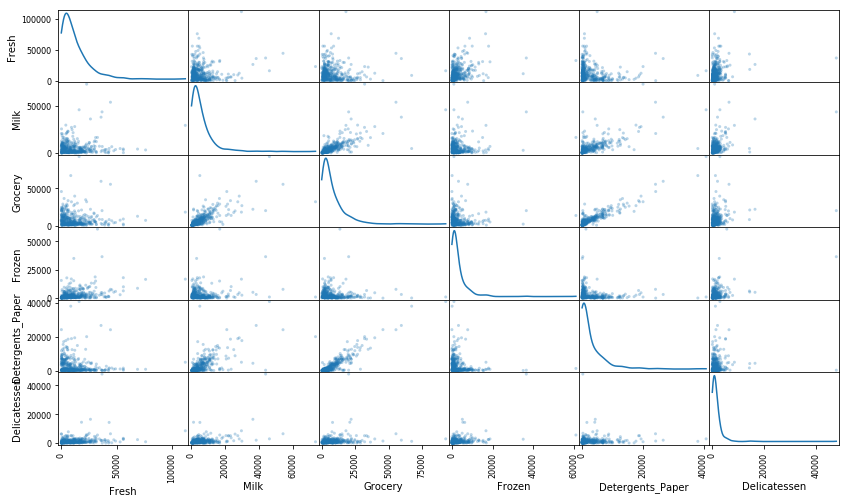

In [13]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [14]:
# correlation matrix for the df 'data'
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


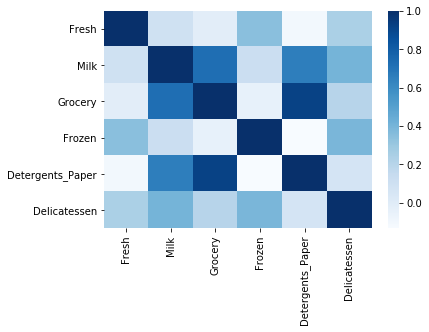

In [15]:
#heatmap to plot the correlation matrix
import seaborn as sns

sns.heatmap(data.corr(), cmap='Blues')

In [16]:
# unstack the df 'data' to list all the correlations, sort them by magnitude then remove the diagonal values (s = 1.0)
s = data.corr().unstack().sort_values(ascending=False)
s = s[s != 1.]
s

Detergents_Paper  Grocery             0.924641
Grocery           Detergents_Paper    0.924641
Milk              Grocery             0.728335
Grocery           Milk                0.728335
Detergents_Paper  Milk                0.661816
Milk              Detergents_Paper    0.661816
Delicatessen      Milk                0.406368
Milk              Delicatessen        0.406368
Frozen            Delicatessen        0.390947
Delicatessen      Frozen              0.390947
Fresh             Frozen              0.345881
Frozen            Fresh               0.345881
Delicatessen      Fresh               0.244690
Fresh             Delicatessen        0.244690
Delicatessen      Grocery             0.205497
Grocery           Delicatessen        0.205497
Frozen            Milk                0.123994
Milk              Frozen              0.123994
                  Fresh               0.100510
Fresh             Milk                0.100510
Delicatessen      Detergents_Paper    0.069291
Detergents_Pa

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* I would not describe any of the pairs shown in the scatter plot as normally distributed. Normally distributed implies that the distribution be symmetrical about the mean with the width defined by the standard deviation. The majority of the plots are skewed heavily towards zero. I suspect if we caculated a Normality test for each pair, we would tend to get positive skew and a range of kurtosis values. Additionally, most pair plots have outliers that sit on the far right hand side upper x or y bound of the distributions.
* There are a few pairs that show a visually obvious correlation:
   * *Detergents_paper* and *Grocery* show a degree of linear correlation. This is supported by a relatively strong Pearson score of 0.92.
   * *Milk* and *Grocery* also shows visually linear correlation which is supported by a Pearson score = 0.72
   * Although it does not have a strong Pearson score (only 0.24), I'd argue *Delicatessen* and *Fresh* looks like it has a fairly linear correlation. Given *Delicatessen* is the lowest spend product category, this trend may look flattened due to there being no feature-scaling applied to the data. 
* This neither confirms nor denies my suspicions about *Delicatessen* being an un-important variable. I'm now more surprised that the DecisionTreeRegressor was unable to fit the data given the (relatively to the eye) linear relationship between *Delicatessen* and each other feature across the bottom row the scatter plot. The Pearson scores for *Delicatessen* and *Milk* or *Delicatessen* and *Frozen* are both around 0.4 which suggests at least some predictability to me.
* I'd argue the *Delicatessen* feature is quite linear. Although they show some outliers at the upper bound of each distribution, the axis of maximum variance in each case is clearly the X axis. It may be possible to reduce this variable to a 1D variable but I will await feature scaling below before committing to this. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

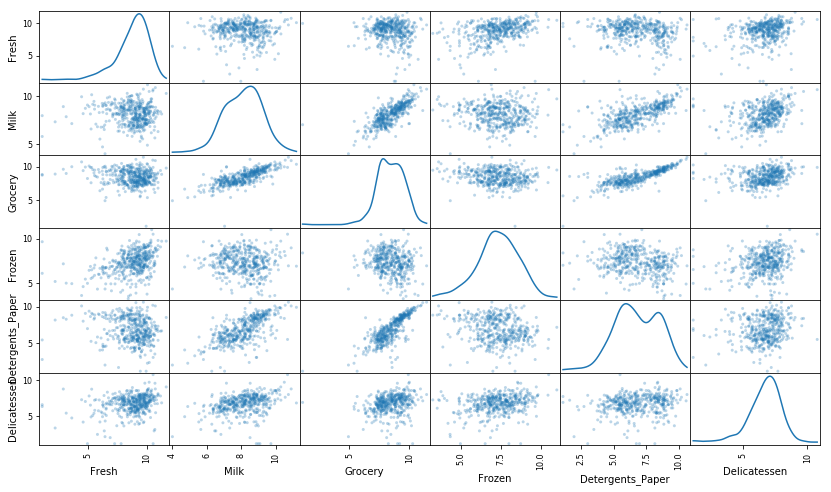

In [17]:
# TODO: Scale the data using the natural logarithm
log_data = data.copy().apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.copy().apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [18]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524,12.205527
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687,12.155668
2,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723,11.921698


In [19]:
log_data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


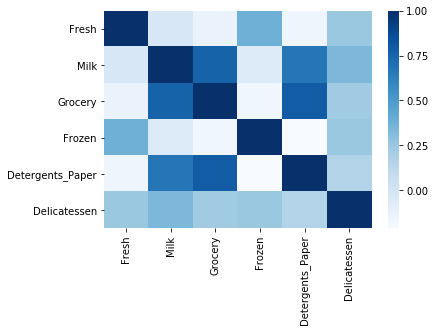

In [20]:
sns.heatmap(log_data.corr(), cmap='Blues')

**Answer:**
    
* Indeed the distributions look much more normal.
  * *Detergents_paper* and *Grocery* looks highly linerarly correlated.
  * *Milk* and *Grocery* still looks linearly correlated.
  * As suspected above, the *Delicatessen* plots now look less obviously 1D.
* The Pearson scores for the highest three values in the unscaled data have all dropped when scaled. I don't have a good intuition as to whether this is expected or not.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [21]:
#I wanted to automate this part so had to make it work on a single feature first before putting it in the loop below
list_1 = []

Q1 = np.percentile(log_data['Fresh'], 25)
Q3 = np.percentile(log_data['Fresh'], 75)
step = 1.5 * (Q3-Q1)
a = log_data[~((log_data['Fresh'] >= Q1 - step) & (log_data['Fresh'] <= Q3 + step))]
b = list(a.index.values)
list_1.append(b)
list_flat = [val for sublist in list_1 for val in sublist]
list_flat

[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]

In [22]:
# For each feature find the data points with extreme high or low values

outliers_catch = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    a = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    b = list(a.index.values)
    outliers_catch.append(b)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 128, 154, 75]

# Remove the outliers, if any were specified

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [23]:
#flatten the list of lists
outliers_flat = [val for sublist in outliers_catch for val in sublist]

#flatten routine stolen from here:
#https://stackoverflow.com/questions/11264684/flatten-list-of-lists/11264799

#print out the list of all outliers
print ("List of lists containing all the outliers found: \n" + str(outliers_catch))
print ("\nTotal amount of outliers across all features: \n" + str(len(set(outliers_flat))))

#get a list of indexes that are duplicates across the outliers_catch
import collections
dupes = [item for item, count in collections.Counter(outliers_flat).items() if count > 1]
print ("\nList of outliers occuring in more than one feature: \n" + str(dupes))

#duplicate code borrowed from here:
#https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them

List of lists containing all the outliers found: 
[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412], [86, 98, 154, 356], [75, 154], [38, 57, 65, 145, 175, 264, 325, 420, 429, 439], [75, 161], [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

Total amount of outliers across all features: 
42

List of outliers occuring in more than one feature: 
[65, 66, 128, 154, 75]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Yes, looking at the variable *dupes* there are five data points that are considered outliers for more than one feature. Looking deeper, they are all only considered outliers in max two features.
* My intuition says I should probably try removing all the outliers BUT I will resist the temptation and try only removing the outliers that occur in more than one feature and see what impact that has on the k-means algorithm. k-means is certainly sensitive to outliers as it can skew the cluster center calculations which are derived from euclidean distances between all points to a chosen cluster center.
* For simplicity I'm going to move forward with only removing the outliers that affect more than one feature. ie. variable *dupes*. If I was to remove all outliers from all features I'd be removing ~10% of the datapoints which feels like too much.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA Parameters after fit: 
<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

Explained Variance by Principle Component: 
[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


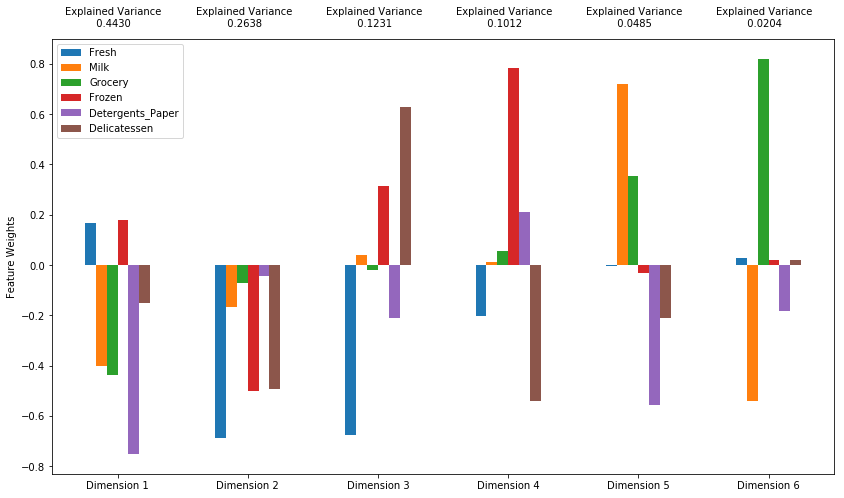

In [24]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)

# QUESTION: Shouldn't we be including a random_state variable in the definition of pca above?

pca.fit(good_data)
print("PCA Parameters after fit: \n" + str(pca.get_params))
print("\nExplained Variance by Principle Component: \n"+str(pca.explained_variance_ratio_))

# TODO: Transform log_samples using the PCA fit above
# I have to remove the 'Total' column I added earlier :-)
log_samples = log_samples.copy().drop(columns='Total')

pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [25]:
ratios = pca.explained_variance_ratio_
cumulative_ratios = np.cumsum(ratios)
for i in range(ratios.shape[0]):
    print(f"Cumulative Variance explained by Component {i + 1}: {cumulative_ratios[i] * 100:.2f}%")

#found this link on the Student Hub and borrowed the code to answer Q5
#http://matthewdeakos.me/wp-content/uploads/2018/02/PCAWalkthrough-1.html

Cumulative Variance explained by Component 1: 44.30%
Cumulative Variance explained by Component 2: 70.68%
Cumulative Variance explained by Component 3: 82.99%
Cumulative Variance explained by Component 4: 93.11%
Cumulative Variance explained by Component 5: 97.96%
Cumulative Variance explained by Component 6: 100.00%


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* 70.68% of the total variance is explained by the first and second principal components.
* 93.11% of the total variance in explained by the first four principal components.
* I'll take each dimension separately and only call out the features with weights that are >=0.4
  * Dimension 1: We'd expect customers who score highly in dimension 1 to purchase low amounts of *Detergents_paper*, *Milk* and *Grocery*.
  * Dimension 2: We'd expect customers who score highly in dimension 2 to purchase low amounts of *Fresh*, *Frozen* and *Delicatessen*.
  * Dimension 3: We'd expect customers who score highly in dimension 3 to purchase large amounts of *Delicatessen* and low amounts of *Fresh*.
  * Dimension 4: We'd expect customers who score highly in dimension 4 to purchase large amounts of *Frozen* and low amounts of *Delicatessen*. 
  * Dimension 5: We'd expect customers who score highly in dimension 5 to purchase large amounts of *Milk* and low amounts of *Detergents_paper*. 
  * Dimension 6: We'd expect customers who score highly in dimension 6 to purchase large amounts of *Grocery* and low amounts of *Milk*.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,-4.2903,-1.4952,-1.4997,0.1394,1.1469,-0.6255


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca2 = PCA(n_components = 2)
pca = pca2.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca2.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-2.1899,-4.8605
2,-4.2903,-1.4952


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

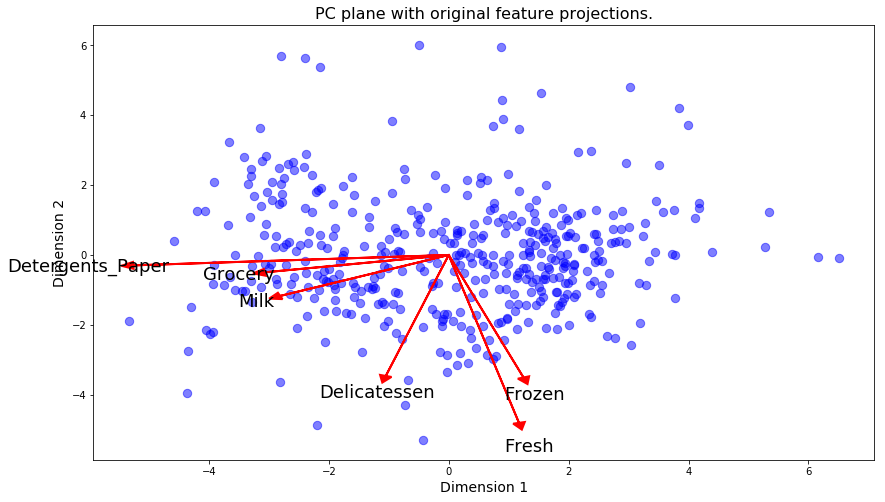

In [29]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:**

* Fresh, Frozen and Delicatessen are more strongly associated with Dimension 1.
* Detergents_paper, Grocery and Milk are more strongly associated with Dimension 2.
* These results are in agreement withe pca_results plot above.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* A few advantages of the k-means clustering algorithm are:
  * On datasets with a large amount of dimensions it may be more computationally efficient than other algorithms.
  * Easy to implement
  * May produce tighter clusters than hierarchical clustering

*Data borrow from here: [http://santini.se/teaching/ml/2016/Lect_10/10c_UnsupervisedMethods.pdf]*
* A few advantages of the Gaussian Mixture Model (GMM) clustering algorithm are:
  * GMM is much more flexible than k-means as it allows for the covariance of the data to more fully be expressed.
  * Allows for multi-membership of some datapoints given it is probabalistic rather than deterministic wrt the clustering
  * Less sensitive to the cluster shape being circular and well separated.

*Couple of key sourcecs: [https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm] and [https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html].*

* I will chose GMM given I expect there is a lot of covariance between the features in this dataset and I'm not expecting to find well separated circular blobs. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn import metrics

clusterer = GaussianMixture(n_components=2, random_state=42, covariance_type='full').fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds, metric='euclidean', random_state=42)
print ("Silhouette Score: ",score)

Silhouette Score:  0.421916846463


In [31]:
# running through a range of values for n_components

n_components = np.arange(2,21)
results = []

for i in n_components:
    clusterer_1 = GaussianMixture(n_components=i, random_state=42, covariance_type='full').fit(reduced_data)
    preds_1 = clusterer_1.predict(reduced_data)
    score = metrics.silhouette_score(reduced_data, preds_1, metric='euclidean', random_state=42)
    results.append(score)

d = pd.DataFrame({'n_components': n_components, 'silhouette_score': results})

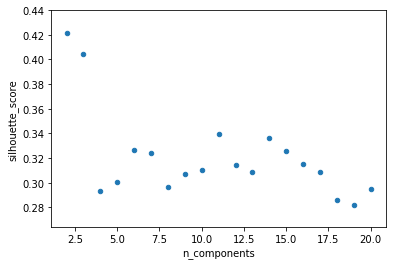

In [32]:
d.plot.scatter(x='n_components', y='silhouette_score')

### Question 7

* Report the silhouette score for several cluster numbers you tried.
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* See chart above
* The best silhouette score is for n_components = 2. I'm cautious about moving forward with only two segments as that seems like a big simplification but I've run n_components up too 100 (not reported in this run for speed) and 2 is the highest value. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

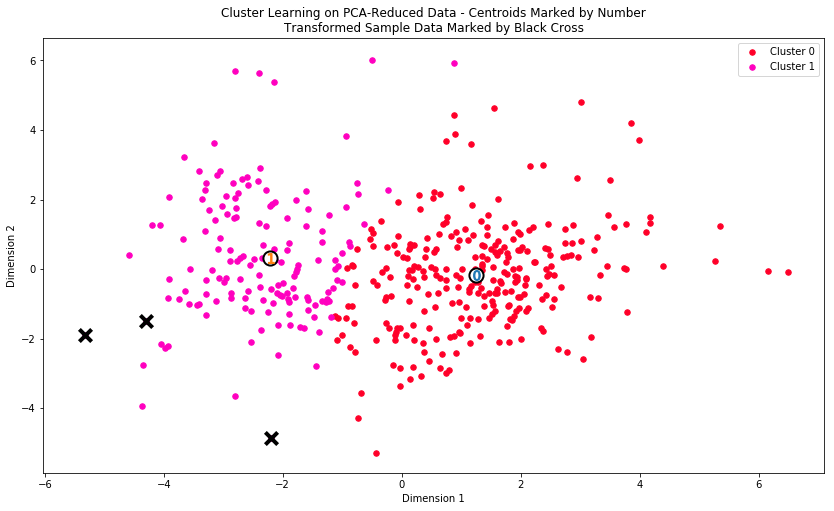

In [33]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [34]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [35]:
#comparing each segment spend centroid to the original mean values in variable data
segments_adj = true_centers.copy()
segments_adj['Fresh'] = segments_adj['Fresh'] / data['Fresh'].mean()
segments_adj['Milk'] = segments_adj['Milk'] / data['Milk'].mean()
segments_adj['Grocery'] = segments_adj['Grocery'] / data['Grocery'].mean()
segments_adj['Frozen'] = segments_adj['Frozen'] / data['Frozen'].mean()
segments_adj['Detergents_Paper'] = segments_adj['Detergents_Paper'] / data['Detergents_Paper'].mean()
segments_adj['Delicatessen'] = segments_adj['Delicatessen'] / data['Delicatessen'].mean()
segments_adj

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,0.746065,0.364718,0.347743,0.675471,0.122506,0.480041
Segment 1,0.295993,1.352077,1.536734,0.283209,1.629711,0.630873


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

* Segment 0: Typically purchases twice as much *Fresh* and *Frozen* than they do *Milk* and *Grocery*. Typically purchases little *Detergents_paper* products.
* Segment 1: Typically purchases approx 1.5 x the average amount of *Detergents_paper*, *Grocery* and *Milk*. *Frozen* is typically the lowest spend category.

I find it very difficult to assign probable establishment types to this dataset with only this information. If I were conducting this analysis in the real world, I would probably sample 10 datapoints from each segment then go back and actually find out what kind of business it is. I assume each customers spend would also include an address, name etc which may provide me enough information to help assign a more credible identity to each segment. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [36]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

* Yes, for the clustering that I have completed here, each sample point is predicted to be in Cluster 1. There is some overlap between Cluster 0 and Cluster 1 but I don't see any reason that couldn't be the case for this dataset. As I mentioned in my answer to Q1, there are no defined relationships between buying say *Frozen* and *Milk* that we are attempting to find using this data. We are only attemping to cluster customers into useful groups with similar annual spending habits. I also see no reason for this to be stable over time. Ie. a given customer may move around groups over time as their procurement strategies respond to market forces which I'd bet is dominated by price in highly commodified markets such as these.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We can assume that the change in delivery schedule will not affect all customers equally. You would imagine anyone purchasing higher volumes of perishable products like those in *Fresh* and *Milk* are likely to be affected most by a change like this. Conversely, someone who purchases a majority of non-perishables may actually prefer fewer deliveries if they have the storage available.

In order to conduct an A/B test, the distributor could create four groups by creating four (two from each Segment) equally sized but randomly sampled groups. Each Group pair would be a Control Group in which nothing changes (5 Day Delivery Schedule) and a Change Group who get to test the (3 Day Delivery Schedule). Then they would adjust the delivery schedules for the two Change groups and measure the Customer Satisfication and Spend for all groups. Once a period of time has elapsed, we can compare the two Control Groups to their respective Change Groups to see if it was indeed a positive or negative change from their perspective.

We'd expect clients having a negative experience will score us accordingly in the Customer Satisfaction scores and may simulatneously reduce their spending. We'd expect the opposite for anyone who enjoys fewer deliveries.

In this way we try out the change on a group which is assumed to representative their entire group. This which allows us to only annoy a few people instead of potentially everyone at once.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

In this example the distributor could use the fitted GMM to predict which segment each new customer would fall into. I've laid out a code block below that performs this function.

The distributor could also take the (now) labelled data and create a surpervised learning model using the customer segments as the labels to be predicted from the features (spend by category). Then predictions could be made using the supervised algorithm to classify new customers into a customer segment as defined by the clustering. I've also added a code block below that performs this function using a DecisionTreeClassifier given it's simple to setup and doesn't require any pre-processing.

In [37]:
#using the same data structure
a = samples.copy().drop(index=[0,1,2], columns='Total')

#enter a new customer based on estimated annual spend by category. Please don't enter a zero! Use '1'for unknowns.
new_customer_1 = {'Fresh': 10000, 
                  'Milk': 1000, 
                  'Grocery': 1, 
                  'Frozen': 10000, 
                  'Detergents_Paper': 1000, 
                  'Delicatessen': 10000}

b = a.append(new_customer_1, ignore_index=True)

#log transform the values
c_log = b.apply(np.log)

#apply pca to the log_values
pca_c = pca.transform(c_log)

#predict which segment they are in using the trained GMM and compute the probabilities of each cluster
c_preds = clusterer.predict(pca_c)
c_prob = clusterer.predict_proba(pca_c)

#print out the results
print ('Our trained GMM Clustering Model predicts that this New Customer will fall into: Cluster',c_preds[0])
print ('With a Cluster 0 Probability of:',c_prob[0][0])
print ('With a Cluster 1 Probability of:',c_prob[0][1])

Our trained GMM Clustering Model predicts that this New Customer will fall into: Cluster 0
With a Cluster 0 Probability of: 0.999998183261
With a Cluster 1 Probability of: 1.81673923623e-06


In [38]:
#add the segments to the original data
X1 = reduced_data
y1 = preds

#train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

#import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train1, y_train1)

#deliberately making no effort to gridsearch or optimize the clf model

#make a prediction for the new_customer data above
pred = clf.predict(pca_c)
prob = clf.predict_proba(pca_c)

#print out the results
print ('The DecisionTree Classifier trained on the engineered labels predicts the New Customer will fall into: Cluster',pred[0])
print ('With a Cluster 0 Probability of:',prob[0][0])
print ('With a Cluster 1 Probability of:',prob[0][1])

The DecisionTree Classifier trained on the engineered labels predicts the New Customer will fall into: Cluster 0
With a Cluster 0 Probability of: 1.0
With a Cluster 1 Probability of: 0.0


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

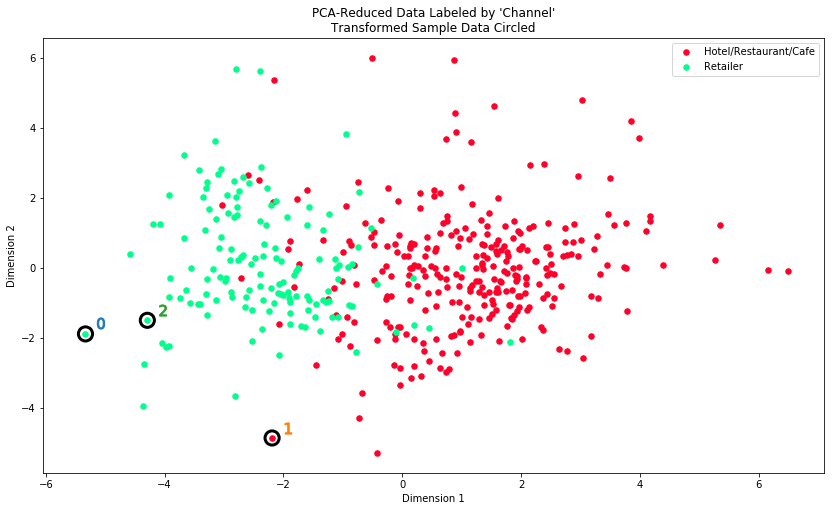

In [39]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* Comparing the two charts visually, I'd argue the GMM clustering I have worked up does a decent job at approximating the cluster shown by the Channel feature. However, in the GMM I have trained there is little overlap between the two clusters whereas in the visual above we can see a lot of overlap between the two clusters. I'm disappointed to see *Sample 2* is being misclassified by my GMM.
* I would argue there is. You can imagine a line running through Dimension 1 = 4 and Dimension 2 = ~10 could create a segment to the right of it that is purely HoReCa. Likewise we could force a line connecting Dimension 1 = -2 and Dimension 2 = ~10 that could create a segment to the left of it which is purely Retailer.
* Whilst I guessed Customer 1 correctly I'd still argue no. Primarily because I had the expectation that we'd be getting down to a more granualar level and would end up with a more specific Segmentation. Having said that, this shows some poor intuition given we only started with 440 datapoints. In essence, like a typical Engineer, I attempted to over-engineer and introduce too much complexity from the outset rather than start with something more general and work our way down as far as the data allows us.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [40]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook customer_segments.ipynb to html',
 '[NbConvertApp] Writing 1162963 bytes to customer_segments.html']